# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Build an end-to-end machine learning pipeline, including a clustering model, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), or [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Identify the optimal number of clusters using the elbow method or the silhouette score if needed.
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Import data
df = pd.read_csv("../../datasets/customers.csv")


df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [14]:
df.shape


(2000, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [16]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [19]:
df.drop(["ID"], axis = 1, inplace=True)

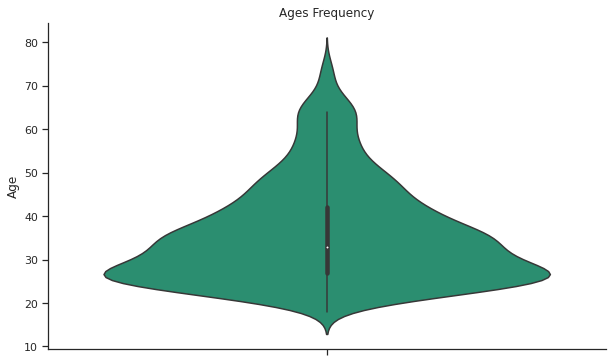

In [20]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

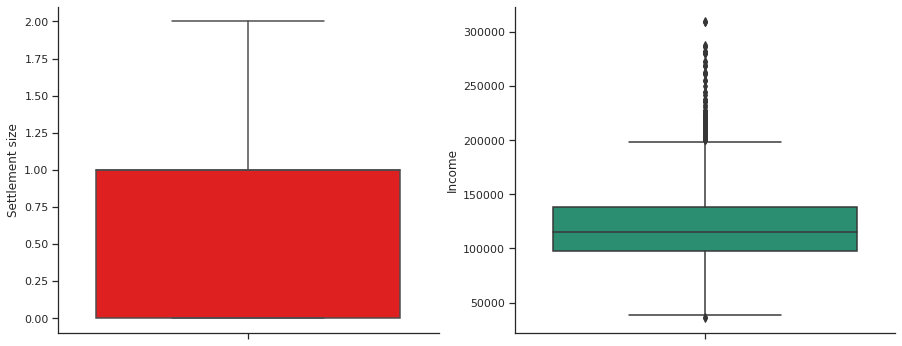

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Settlement size"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"])
plt.show()

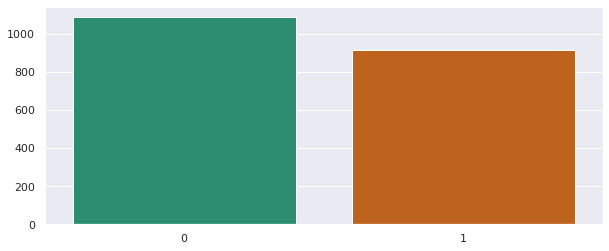

In [23]:
genders = df.Sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

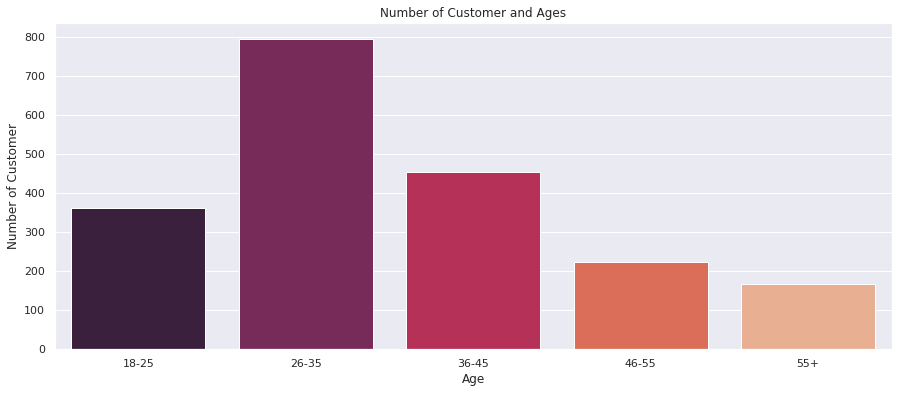

In [24]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

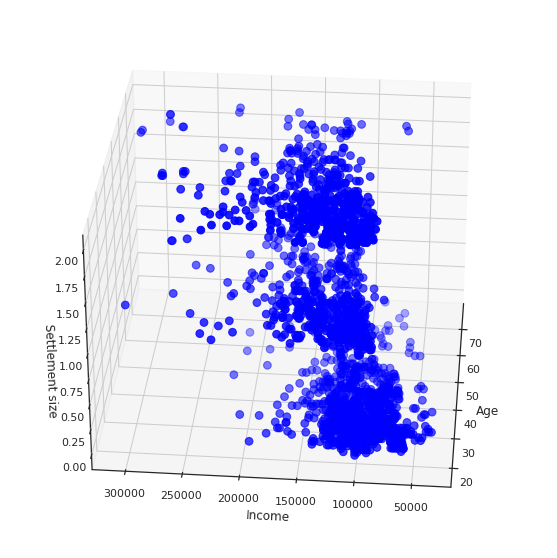

In [26]:


from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Income"], df["Settlement size"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Settlement size')
plt.show()



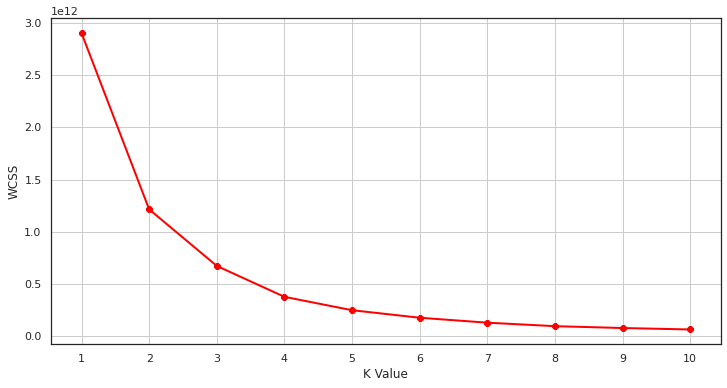

In [27]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

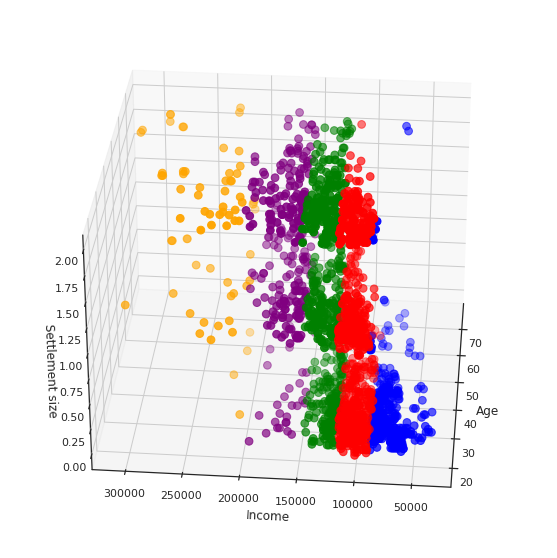

In [28]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["Settlement size"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["Settlement size"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["Settlement size"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["Settlement size"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["Settlement size"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Settlement size')
plt.show()